# Restaurant Rating Prediction

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading

In [4]:
adv = pd.read_excel(r"C:\Users\USER\Downloads\Datasets\zomato_data.xlsx")
adv.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,...,Datekey_Opening,Unnamed: 20,Cuisines 1,Cuisines 2,Cuisines 3,Cuisines 4,Cuisines 5,Cuisines 6,Cuisines 7,Cuisines 8
0,18435314,Punjabi's Veg Grill,1,New Delhi,"13/288 , 14 Block Gurudwra, Geeta Colony, New ...",Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,...,2013_9_21,NaN,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18378015,Tasty Tandoor,1,New Delhi,"726/2, Jheel Khuranja, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,...,2016_9_10,NaN,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18424905,Taste of Spice,1,New Delhi,"C-222, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,...,2018_9_25,NaN,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18180072,Kolcata Bengali Dhaba,1,New Delhi,"Gali 7, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.123932,28.543587,North Indian,...,2018_9_6,NaN,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18415377,Sunil Punjabi Dhaba,1,New Delhi,"Main Vasant Kunj Road, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.129706,28.541369,North Indian,...,2013_9_17,NaN,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning

In [4]:
adv.isnull().sum()

RestaurantID               0
RestaurantName             0
CountryCode                0
City                       0
Address                    0
Locality                   0
LocalityVerbose            0
Longitude                  0
Latitude                   0
Cuisines                   9
Currency                   0
Has_Table_booking          0
Has_Online_delivery        0
Is_delivering_now          0
Switch_to_order_menu       0
Price_range                0
Votes                      0
Average_Cost_for_two       0
Rating                     0
Datekey_Opening            0
Unnamed: 20             9551
Cuisines 1                 9
Cuisines 2              3403
Cuisines 3              6847
Cuisines 4              8687
Cuisines 5              9271
Cuisines 6              9435
Cuisines 7              9509
Cuisines 8              9537
dtype: int64

In [7]:
# for i in adv.columns:
#     print(i,':','\n',adv[i].unique())

### Dropping Columns

In [5]:
adv.drop(columns=['RestaurantID', 'RestaurantName', 'Unnamed: 20', 'Address', 'Locality', 'LocalityVerbose', 'Currency'], inplace=True)

In [6]:
adv.head()

,CountryCode,City,Longitude,Latitude,Cuisines,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,...,Rating,Datekey_Opening,Cuisines 1,Cuisines 2,Cuisines 3,Cuisines 4,Cuisines 5,Cuisines 6,Cuisines 7,Cuisines 8
0,1,New Delhi,77.276769,28.650775,North Indian,No,No,No,No,1,...,1.0,2013_9_21,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,New Delhi,77.275052,28.658216,North Indian,No,No,No,No,1,...,1.0,2016_9_10,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,New Delhi,77.241312,28.578311,North Indian,No,Yes,No,No,1,...,1.0,2018_9_25,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,New Delhi,77.123932,28.543587,North Indian,No,No,No,No,1,...,1.0,2018_9_6,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,New Delhi,77.129706,28.541369,North Indian,No,No,No,No,1,...,1.0,2013_9_17,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merging Cuisine columns

In [7]:
cuisine_cols = ['Cuisines','Cuisines 1','Cuisines 2','Cuisines 3',
                'Cuisines 4','Cuisines 5','Cuisines 6','Cuisines 7','Cuisines 8']

In [8]:
adv[cuisine_cols] = adv[cuisine_cols].fillna('')

In [9]:
adv['All_Cuisines'] = adv[cuisine_cols].apply(lambda x: ','.join(x.astype(str)), axis=1)

In [10]:
adv['All_Cuisines'] = (
    adv['All_Cuisines']
    .str.replace(r'\s*,\s*', ',', regex=True)   
    .str.replace(r',+', ',', regex=True)        
    .str.strip(', ')                            
)

### Dropping Cuisines Columns

In [11]:
adv.drop(columns=['Cuisines','Cuisines 1','Cuisines 2','Cuisines 3','Cuisines 4','Cuisines 5','Cuisines 6','Cuisines 7','Cuisines 8'], inplace=True)

In [10]:
adv.head()

,CountryCode,City,Longitude,Latitude,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening,All_Cuisines
0,1,New Delhi,77.276769,28.650775,No,No,No,No,1,0,300,1.0,2013_9_21,"North Indian,North Indian"
1,1,New Delhi,77.275052,28.658216,No,No,No,No,1,0,200,1.0,2016_9_10,"North Indian,North Indian"
2,1,New Delhi,77.241312,28.578311,No,Yes,No,No,1,0,400,1.0,2018_9_25,"North Indian,North Indian"
3,1,New Delhi,77.123932,28.543587,No,No,No,No,1,0,100,1.0,2018_9_6,"North Indian,North Indian"
4,1,New Delhi,77.129706,28.541369,No,No,No,No,1,0,150,1.0,2013_9_17,"North Indian,North Indian"


In [31]:
adv.isnull().sum()

CountryCode             0
City                    0
Longitude               0
Latitude                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
Datekey_Opening         0
All_Cuisines            0
dtype: int64

### Exploratory Data Analysis

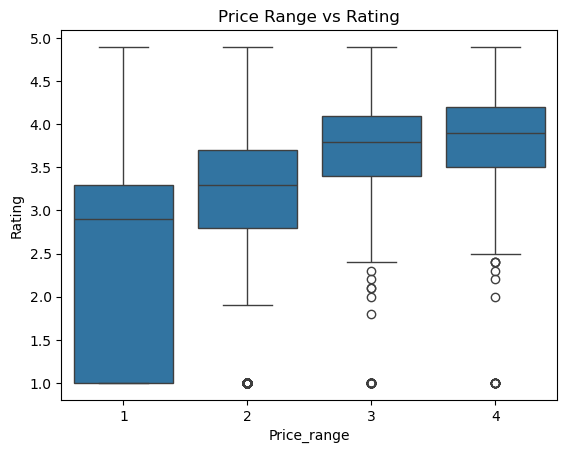

In [34]:
sns.boxplot(x=adv['Price_range'], y=adv['Rating'], data=adv)
plt.title('Price Range vs Rating')
plt.show()

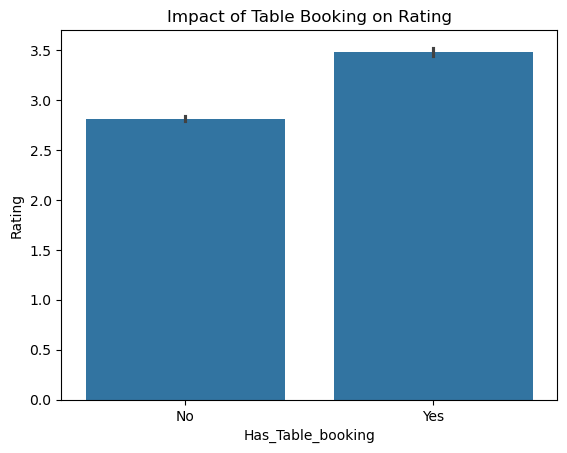

In [35]:
sns.barplot(x=adv['Has_Table_booking'], y=adv['Rating'], data=adv)
plt.title('Impact of Table Booking on Rating')
plt.show()

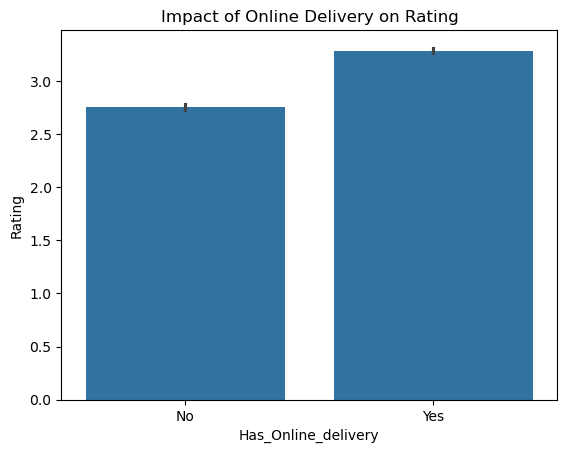

In [36]:
sns.barplot(x=adv['Has_Online_delivery'], y=adv['Rating'], data=adv)
plt.title('Impact of Online Delivery on Rating')
plt.show()

### Encoding

In [12]:
binary_cols = ['Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu']
for col in binary_cols:
    adv[col] = adv[col].map({'Yes': 1, 'No': 0})

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_cols = ['City']  
for col in label_cols:
    adv[col] = le.fit_transform(adv[col])

In [14]:
adv = pd.get_dummies(adv, columns=['CountryCode', 'Price_range'], drop_first=True)

In [14]:
adv['Datekey_Opening'].head()

0    2013_9_21
1    2016_9_10
2    2018_9_25
3     2018_9_6
4    2013_9_17
Name: Datekey_Opening, dtype: object

In [15]:
adv['All_Cuisines'] = adv['All_Cuisines'].apply(lambda x: x.split(',') if x != '' else [])

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

# Ensure it’s a list
adv['All_Cuisines'] = adv['All_Cuisines'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(mlb.fit_transform(adv['All_Cuisines']), columns=mlb.classes_)

# Merge with main dataframe
adv = pd.concat([adv, cuisine_encoded], axis=1)

# Drop original column if needed
adv.drop('All_Cuisines', axis=1, inplace=True)


In [78]:
adv.head()

,City,Longitude,Latitude,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Votes,Average_Cost_for_two,Rating,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,88,77.276769,28.650775,0,0,0,0,0,300,1.0,...,0,0,0,0,0,0,0,0,0,0
1,88,77.275052,28.658216,0,0,0,0,0,200,1.0,...,0,0,0,0,0,0,0,0,0,0
2,88,77.241312,28.578311,0,1,0,0,0,400,1.0,...,0,0,0,0,0,0,0,0,0,0
3,88,77.123932,28.543587,0,0,0,0,0,100,1.0,...,0,0,0,0,0,0,0,0,0,0
4,88,77.129706,28.541369,0,0,0,0,0,150,1.0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
for i in adv.columns:
    print(i,':','\n',adv[i].unique())

City : 
 [ 88  91  42 118 115 119 124 129  20 110  72  40   3 104  34  36 133  74
   9 137  67  18 117 121 111  21  97 140  38   6   0  60  22 103  39 113
  56  35  49  87   4 105 130  51 128  61 120 134  29  55  50  76  96   1
  85  75 123  69  86   2  16  11  89  43  24  26  63 106 116  14  54  84
  48  58  62  81  17 108   5  70  93  94  10  80 101  31  23  47  99   8
  90 135  33 131  65  44  78  27  66 102 136  82  28 138  25  45  79   7
  52 139  15  32  68 126  41  12  64  98 132  46  37  57  53  92  71  83
 127  77 100  95  73 122 112  30  19 125  59 114  13 109 107]
Longitude : 
 [77.2767689  77.27505159 77.2413122  ... -1.858529   79.8581047
 32.80924722]
Latitude : 
 [28.6507753  28.65821556 28.5783107  ... 52.443963    6.90853627
 39.91320556]
Has_Table_booking : 
 [0 1]
Has_Online_delivery : 
 [0 1]
Is_delivering_now : 
 [0 1]
Switch_to_order_menu : 
 [0]
Votes : 
 [   0  782  886 ... 1662 1476 1351]
Average_Cost_for_two : 
 [   300    200    400    100    150     50    25

### Feature Engineering

In [17]:
adv['Datekey_Opening'] = pd.to_datetime(
    adv['Datekey_Opening'].str.replace('_', '-'),
    errors='coerce'
)

adv['Opening_Year'] = adv['Datekey_Opening'].dt.year
adv['Opening_Month'] = adv['Datekey_Opening'].dt.month
adv['Opening_Day'] = adv['Datekey_Opening'].dt.day

from datetime import datetime
adv['Restaurant_Age_Days'] = (datetime.now() - adv['Datekey_Opening']).dt.days

adv.drop('Datekey_Opening', axis=1, inplace=True)

In [18]:
# Cap cost at 99th percentile
upper = adv['Average_Cost_for_two'].quantile(0.99)
adv.loc[adv['Average_Cost_for_two'] > upper, 'Average_Cost_for_two'] = upper


### heat map

In [81]:
 c = adv.corr()
 c

,City,Longitude,Latitude,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Votes,Average_Cost_for_two,Rating,...,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine,Opening_Year,Opening_Month,Opening_Day,Restaurant_Age_Days
City,1.000000,0.117391,-0.004301,-0.003762,0.012723,-0.014039,NaN,-0.078406,-0.033395,-0.146097,...,0.008489,-0.090241,-0.026975,-0.003019,-0.025123,-0.004678,0.012579,0.013793,0.000254,-0.014019
Longitude,0.117391,1.000000,0.043207,0.100488,0.178757,0.018787,NaN,-0.085101,0.238068,-0.145930,...,-0.015112,-0.021859,-0.177290,-0.025481,0.024834,-0.016376,0.002265,0.021434,0.002866,-0.004593
Latitude,-0.004301,0.043207,1.000000,0.054658,0.118722,0.015001,NaN,-0.022962,-0.030058,-0.019806,...,0.006354,0.036982,0.031904,-0.001432,-0.090476,0.027170,0.001672,-0.000174,0.003433,-0.001676
Has_Table_booking,-0.003762,0.100488,0.054658,1.000000,0.101224,-0.016816,NaN,0.169422,0.597840,0.194573,...,-0.006631,-0.010755,-0.018250,0.009957,-0.012025,-0.007603,-0.003328,0.011337,0.010756,0.001975
Has_Online_delivery,0.012723,0.178757,0.118722,0.101224,1.000000,0.101730,NaN,0.074303,0.103132,0.206506,...,0.013019,-0.017012,-0.028867,0.013362,-0.019022,-0.012026,0.014405,0.011542,0.011974,-0.015673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World Cuisine,-0.004678,-0.016376,0.027170,-0.007603,-0.012026,-0.001223,NaN,0.015196,-0.016523,0.025545,...,-0.000812,-0.000593,-0.001006,-0.000961,-0.000663,1.000000,0.001943,0.023715,0.006215,-0.004570
Opening_Year,0.012579,0.002265,0.001672,-0.003328,0.014405,0.001964,NaN,-0.003605,0.002152,0.008167,...,0.000975,-0.013919,-0.001689,0.002526,0.009907,0.001943,1.000000,-0.002758,-0.000729,-0.994049
Opening_Month,0.013793,0.021434,-0.000174,0.011337,0.011542,0.003917,NaN,-0.005724,0.008556,-0.002910,...,-0.003955,0.006009,-0.006525,0.010233,0.013824,0.023715,-0.002758,1.000000,-0.008885,-0.105856
Opening_Day,0.000254,0.002866,0.003433,0.010756,0.011974,0.005165,NaN,-0.012346,0.003077,0.006186,...,-0.014322,-0.002792,-0.006907,0.007375,0.005845,0.006215,-0.000729,-0.008885,1.000000,-0.006805


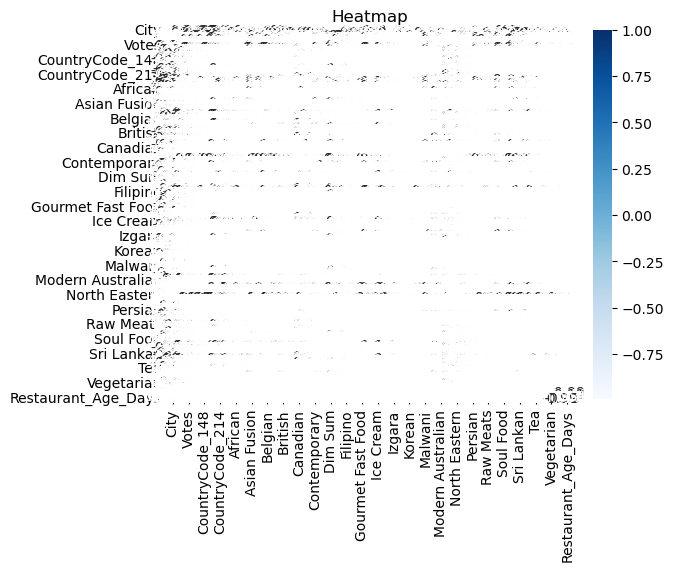

In [82]:
 sns.heatmap(c,annot=True,cmap='Blues')
 plt.title('Heatmap')
 plt.show()

### ip and op creation

In [19]:
ip = adv.drop('Rating',axis=1)
op = adv.Rating

In [20]:
 ip.head()

,City,Longitude,Latitude,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Votes,Average_Cost_for_two,CountryCode_14,...,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine,Opening_Year,Opening_Month,Opening_Day,Restaurant_Age_Days
0,88,77.276769,28.650775,0,0,0,0,0,300,False,...,0,0,0,0,0,0,2013,9,21,4430
1,88,77.275052,28.658216,0,0,0,0,0,200,False,...,0,0,0,0,0,0,2016,9,10,3345
2,88,77.241312,28.578311,0,1,0,0,0,400,False,...,0,0,0,0,0,0,2018,9,25,2600
3,88,77.123932,28.543587,0,0,0,0,0,100,False,...,0,0,0,0,0,0,2018,9,6,2619
4,88,77.129706,28.541369,0,0,0,0,0,150,False,...,0,0,0,0,0,0,2013,9,17,4434


In [21]:
 op.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Rating, dtype: float64

### Train test split

In [22]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2)

### Standard Scaler

In [23]:
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 x_train = sc.fit_transform(x_train)
 x_test = sc.fit_transform(x_test)

### Machine Learning Model

#### Linear Regression

In [24]:
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()
 lr.fit(x_train,y_train)

LinearRegression()

### Prediction

In [25]:
 ypred = lr.predict(x_test)

### Accuracy,r2score,mean squared error

In [26]:
 from sklearn.metrics import r2_score,mean_squared_error
 r2 = r2_score(ypred,y_test)
 mse = mean_squared_error(ypred,y_test)
 print('R2 score is :',r2)
 print('Mean Squared Error is :',mse)

R2 score is : -4.163336342344337e-13
Mean Squared Error is : 1.1161329727759907e+23


In [27]:
 df = pd.DataFrame({'Prediction':ypred,'Actual data':y_test})
 df.head()

,Prediction,Actual data
394,1.488931e+10,1.0
1151,1.488931e+10,3.3
2283,1.488931e+10,3.5
5159,1.488931e+10,3.3
1216,1.488931e+10,3.2


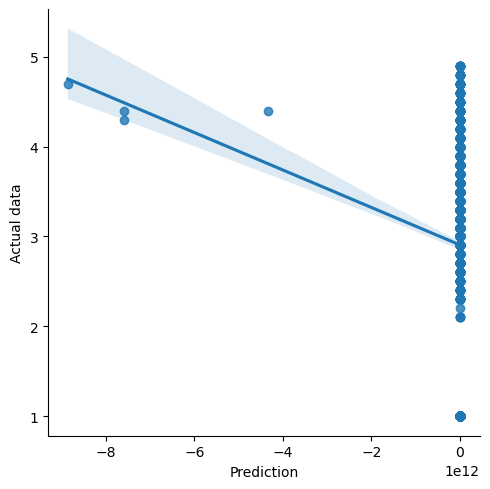

In [28]:
 sns.lmplot(df,x='Prediction',y='Actual data')
 plt.show()

In [64]:
adv.head()

,City,Longitude,Latitude,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Votes,Average_Cost_for_two,Rating,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,88,77.276769,28.650775,0,0,0,0,0,300,1.0,...,0,0,0,0,0,0,0,0,0,0
1,88,77.275052,28.658216,0,0,0,0,0,200,1.0,...,0,0,0,0,0,0,0,0,0,0
2,88,77.241312,28.578311,0,1,0,0,0,400,1.0,...,0,0,0,0,0,0,0,0,0,0
3,88,77.123932,28.543587,0,0,0,0,0,100,1.0,...,0,0,0,0,0,0,0,0,0,0
4,88,77.129706,28.541369,0,0,0,0,0,150,1.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Identify all cuisine columns (binary columns with 0/1)
list_of_cuisine_columns = [col for col in adv.columns if adv[col].isin([0, 1]).all() and col not in [
    'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu'
]]

In [30]:
corr_with_rating = adv[list_of_cuisine_columns + ['Rating']].corr()['Rating'].sort_values(ascending=False)
print(corr_with_rating)

Rating             1.000000
Price_range_3      0.300957
CountryCode_216    0.216488
Price_range_4      0.214135
Italian            0.188216
                     ...   
Bakery            -0.043851
Fast Food         -0.052284
Street Food       -0.055888
Mithai            -0.086218
North Indian      -0.106380
Name: Rating, Length: 163, dtype: float64


In [39]:
top_cuisines = corr_with_rating[abs(corr_with_rating) > 0.05].index.tolist()

In [40]:
other_important_columns = [
    'City', 'Longitude', 'Latitude',
    'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
    'Votes', 'Average_Cost_for_two',  'Rating'
]

In [41]:
adv = adv[top_cuisines + other_important_columns]

In [57]:
# adv[['Year', 'Month', 'Day']] = adv['Datekey_Opening'].str.split('_', expand=True).astype(int)
# adv.drop(columns=['Datekey_Opening'], inplace=True)

In [43]:
X = adv.drop(columns=['Rating'])
y = adv['Rating']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

#### Ridge Regression

In [46]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [47]:
y_pred = ridge.predict(X_test)

In [48]:
print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 score: 0.39176057326032254
Mean Squared Error: 0.8033972118319993


#### Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [51]:
print("R2 score (Random Forest):", r2_score(y_test, y_pred_rf))
print("Mean Squared Error (Random Forest):", mean_squared_error(y_test, y_pred_rf))

R2 score (Random Forest): 0.926402737631931
Mean Squared Error (Random Forest): 0.097211447968632


In [52]:
importance = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = importance.sort_values(ascending=False).head(15)
print(top_features)

Votes                   0.906415
Longitude               0.033636
Latitude                0.023573
Average_Cost_for_two    0.011078
North Indian            0.002925
City                    0.002739
Has_Online_delivery     0.002106
Fast Food               0.002067
Continental             0.001758
CountryCode_30          0.001422
Price_range_2           0.001285
Desserts                0.001256
Cafe                    0.001114
Asian                   0.000878
American                0.000871
dtype: float64


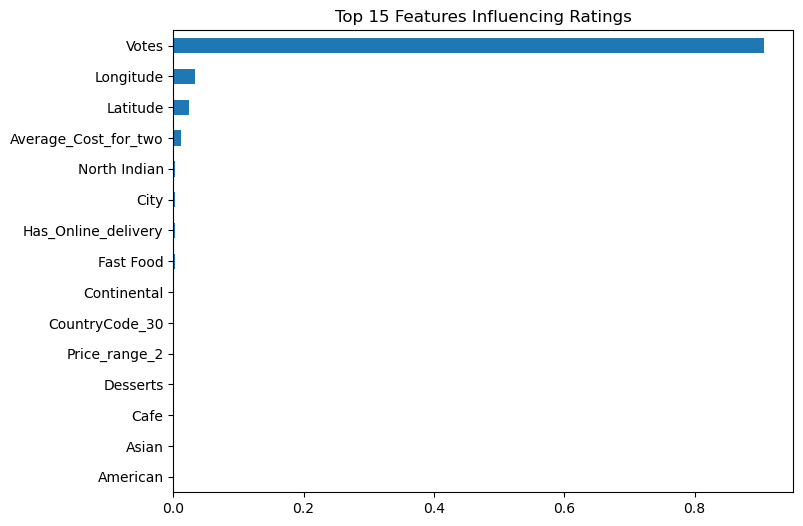

In [53]:
top_features.plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Features Influencing Ratings")
plt.gca().invert_yaxis()
plt.show()

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.8683699564693328


In [1]:
import joblib

In [56]:
joblib.dump(rf, 'restaurant_rating_model.pkl')

['restaurant_rating_model.pkl']

In [58]:
rf_loaded = joblib.load('restaurant_rating_model.pkl')

In [59]:
rf_loaded.predict(X_test)

array([[3.007 , 3.007 , 3.007 , 3.007 ],
       [3.4105, 3.4105, 3.4105, 3.4105],
       [3.5755, 3.5755, 3.5755, 3.5755],
       ...,
       [4.6365, 4.6365, 4.6365, 4.6365],
       [3.106 , 3.106 , 3.106 , 3.106 ],
       [1.    , 1.    , 1.    , 1.    ]])